<a href="https://colab.research.google.com/github/upul/WhiteBoard/blob/master/test/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt 

from sklearn import datasets
sns.set()

In [0]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
X_two_species = X[:100, 0]
y_two_species = y[:100]

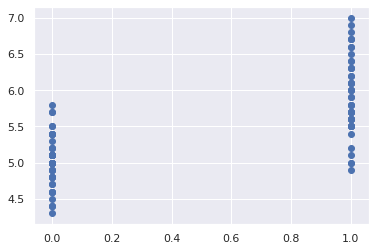

In [40]:
plt.scatter(x=y_two_species, y=X_two_species)
plt.show()
